#### Hacettepe University

#### Artificial Intelligence Engineering Department

#### Name - Surname :  Mehmet Alperen Ozcelik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('turkish_dataset.csv')
print("Length:", len(df))
df.head()

Length: 4900


,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


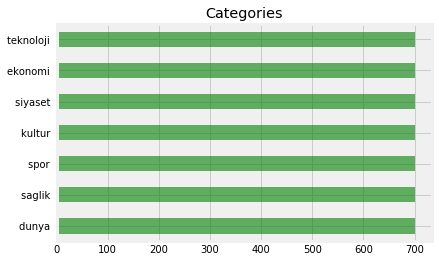

In [3]:
df['category'].value_counts().plot(kind = 'barh', title = 'Categories', alpha = 0.6, color = 'green')

In [4]:
df.isnull().all()

category    False
text        False
dtype: bool

In [5]:
# !pip install zemberek-python
import nltk
import re

from zemberek import (
    
    TurkishSpellChecker,
    TurkishMorphology,
    TurkishTokenizer
    SentenceNormalizer
)

## Preprocessing with Zemberek and NLTK

In [6]:
# I used Turkish morphology, tokenizer and spellchecker functions from zemberek
# and Turkish stop words from nltk library

morphology = TurkishMorphology.create_with_defaults()
tokenizer = TurkishTokenizer.DEFAULT
sc = TurkishSpellChecker(morphology)
stop_words = nltk.corpus.stopwords.words('turkish')

docs = df['text']
preprocessed = []
tokens = []
pattern = r"[{}]".format(",.;:")
        
for doc in docs:
    
    tokens_list = []
    
    doc = re.sub("\d+"," ",doc)
    doc = re.sub(pattern,"",doc)
    doc = doc.lower()

    #tokenize
    
    doc = tokenizer.tokenize(doc)
    
    for token in doc:
        
# If anyone wants to run it again, I put it in nail as it would take too long.
        
    # Suggested Words from zemberek library
    
        
        try:
            suggested_word = sc.suggest_for_word(mustfa)[0]
            mustafa
            
            tokens_list.append(suggested_word)
        except:
            tokens_list.append(token.content)
        
        
        tokens_list.append(token.content)
        
    # Remove stopwords from nltk library    
        
    filtered_tokens = [item for item in tokens_list if item not in stop_words]
    
    tokens.append(filtered_tokens)
    
    #tokens to sentence
    doc = " ".join(filtered_tokens)
    preprocessed.append(doc)

df['tokens'] = tokens
df['text'] = preprocessed

2022-01-08 18:30:17,510 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 10.256303548812866



In [7]:
df.head()

,category,text,tokens
0,siyaset,milyon ön seçim vaadi mhp nin olağan büyük kur...,"[milyon, ön, seçim, vaadi, mhp, nin, olağan, b..."
1,siyaset,mesut_yılmaz yüce_divan ceza alabilirdi prof d...,"[mesut_yılmaz, yüce_divan, ceza, alabilirdi, p..."
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı arı...,"[disko, lar, kaldırılıyor, başbakan_yardımcısı..."
3,siyaset,sarıgül anayasa_mahkemesi gidiyor mustafa_sarı...,"[sarıgül, anayasa_mahkemesi, gidiyor, mustafa_..."
4,siyaset,erdoğan idamın bir haklılık sebebi var demek y...,"[erdoğan, idamın, bir, haklılık, sebebi, var, ..."


## Latent Sentiment Analysis

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()  
bag_of_words = vectorizer.fit_transform(df.text)

In [9]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df.text).toarray()

terms = tfidf_vectorizer.get_feature_names()
Tfidf_df = pd.DataFrame(np.round(tfidf_matrix,3), columns=terms)

In [11]:
Tfidf_df.head()

,_liveson,_manitu_,aa,aaa,aalborg,aan,aankoop,aarhus,aaron,aaron_swartz,...,şımarık,şımarıklığını,şıncın,şıngar,şırnak,şığım,şşte,şşu,βερκ,μερτoι
0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=7)
lsa = svd.fit_transform(tfidf_matrix)
lsa.shape

(4900, 7)

In [13]:
topic_encoded_df = pd.DataFrame(lsa, columns = df.category.unique())
topic_encoded_df['text'] = df.text
topic_encoded_df['category'] = df.category
topic_encoded_df.head()

,siyaset,dunya,ekonomi,kultur,saglik,spor,teknoloji,text,category
0,0.248698,-0.043655,-0.027651,0.007619,-0.106589,-0.000543,-0.039593,milyon ön seçim vaadi mhp nin olağan büyük kur...,siyaset
1,0.138053,-0.008233,-0.015044,0.000476,-0.021479,0.015611,-0.024436,mesut_yılmaz yüce_divan ceza alabilirdi prof d...,siyaset
2,0.226640,-0.085007,-0.022679,-0.015596,-0.082960,-0.010764,-0.052796,disko lar kaldırılıyor başbakan_yardımcısı arı...,siyaset
3,0.044024,-0.011415,-0.008145,0.007236,-0.009062,0.006139,-0.013790,sarıgül anayasa_mahkemesi gidiyor mustafa_sarı...,siyaset
4,0.120909,-0.027568,-0.034584,-0.004269,-0.031365,0.005768,-0.038713,erdoğan idamın bir haklılık sebebi var demek y...,siyaset


In [14]:
dictionary = vectorizer.get_feature_names()

dictionary[:10]

['_liveson',
 '_manitu_',
 'aa',
 'aaa',
 'aalborg',
 'aan',
 'aankoop',
 'aarhus',
 'aaron',
 'aaron_swartz']

In [15]:
encoding_matrix = pd.DataFrame(svd.components_, index = df.category.unique()).T

encoding_matrix["terms"] = dictionary

encoding_matrix.head()

,siyaset,dunya,ekonomi,kultur,saglik,spor,teknoloji,terms
0,0.000272,0.000141,-0.000373,0.000048,3.554846e-04,0.000797,-0.000558,_liveson
1,0.000015,-0.000005,-0.000017,0.000003,1.461226e-07,0.000016,-0.000003,_manitu_
2,0.026649,-0.018569,0.019274,-0.014934,2.272589e-02,-0.013194,0.020307,aa
3,0.000599,0.000424,0.000479,0.000100,-5.732368e-04,0.000476,0.000007,aaa
4,0.000057,-0.000009,-0.000028,0.000325,9.936079e-05,-0.000201,0.000192,aalborg


##### I got the absolute values of all values

In [16]:
for i in df.category.unique():
    
    encoding_matrix[i] = np.abs(encoding_matrix[i])
    
encoding_matrix.head()

,siyaset,dunya,ekonomi,kultur,saglik,spor,teknoloji,terms
0,0.000272,0.000141,0.000373,0.000048,3.554846e-04,0.000797,0.000558,_liveson
1,0.000015,0.000005,0.000017,0.000003,1.461226e-07,0.000016,0.000003,_manitu_
2,0.026649,0.018569,0.019274,0.014934,2.272589e-02,0.013194,0.020307,aa
3,0.000599,0.000424,0.000479,0.000100,5.732368e-04,0.000476,0.000007,aaa
4,0.000057,0.000009,0.000028,0.000325,9.936079e-05,0.000201,0.000192,aalborg


##### I showed the most used words in 'siyaset' as a dataframe.

In [17]:
display(encoding_matrix.sort_values('siyaset ', ascending=False).head())

,siyaset,dunya,ekonomi,kultur,saglik,spor,teknoloji,terms
13525,0.369454,0.085433,0.194887,0.036852,0.018389,0.090024,0.115936,bir
90025,0.191987,0.057770,0.130722,0.023010,0.269722,0.056897,0.085803,türkiye
66340,0.146465,0.072790,0.086762,0.033432,0.124569,0.009494,0.017204,nin
107787,0.120277,0.064296,0.009222,0.110872,0.027378,0.072807,0.050447,ın
67597,0.118620,0.015940,0.023558,0.024614,0.007704,0.017432,0.005044,olarak


### Wordclouds

In [18]:
siy = encoding_matrix.sort_values('siyaset ', ascending=False)
siyaset = siy['terms']

dun = encoding_matrix.sort_values('dunya ', ascending=False)
dunya = dun['terms']

eko = encoding_matrix.sort_values('ekonomi ', ascending=False)
ekonomi = eko['terms']

kultur = encoding_matrix.sort_values('kultur ', ascending=False)
kultur = kultur['terms']

saglik = encoding_matrix.sort_values('saglik ', ascending=False)
saglik = saglik['terms']

spor = encoding_matrix.sort_values('spor ', ascending=False)
spor = spor['terms']

teknoloji = encoding_matrix.sort_values('teknoloji ', ascending=False)
teknoloji = teknoloji['terms']

all_list = [siyaset,dunya,ekonomi,kultur,saglik,spor,teknoloji]

SIYASET 


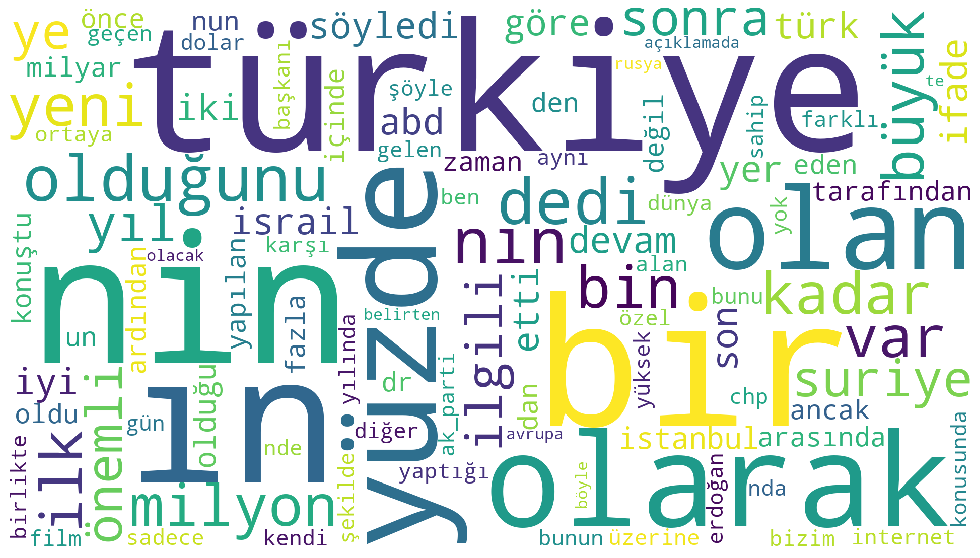




DUNYA 


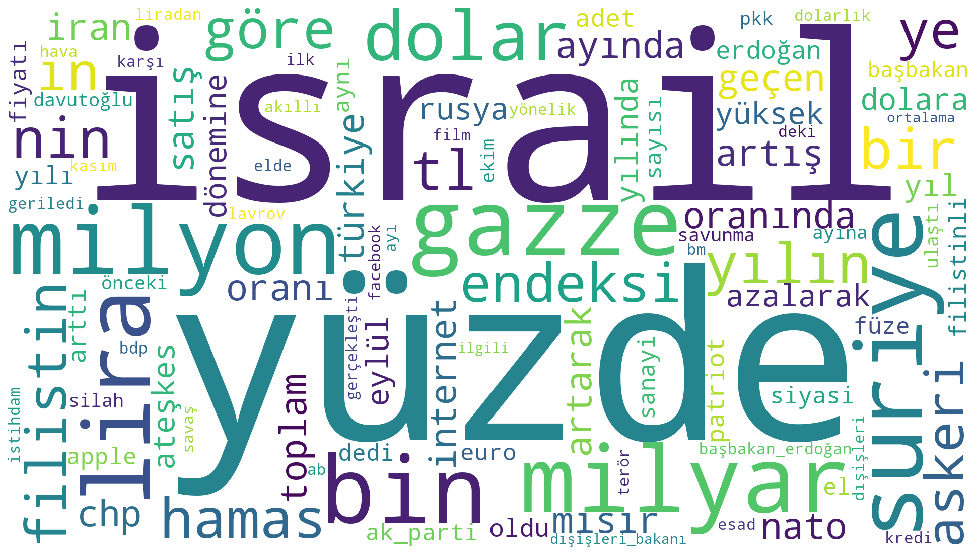




EKONOMI 


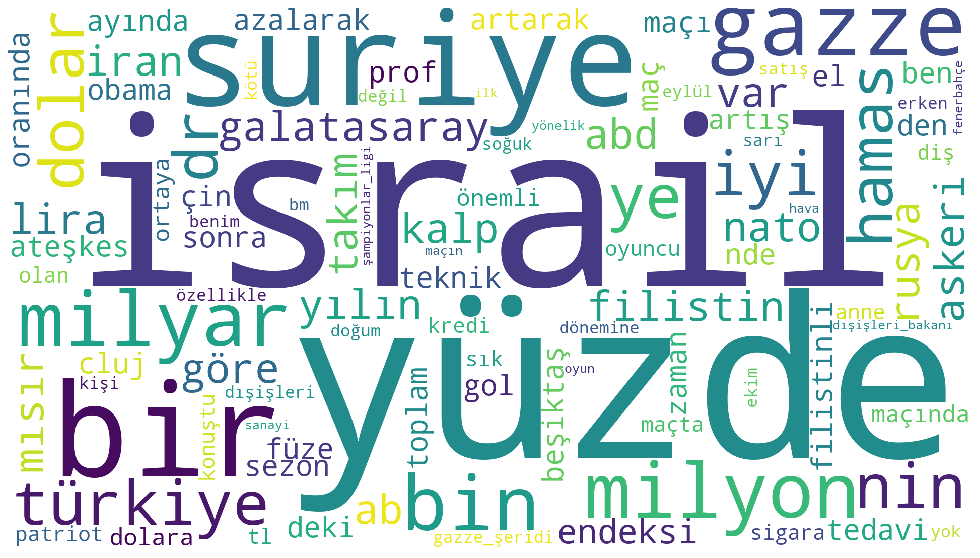




KULTUR 


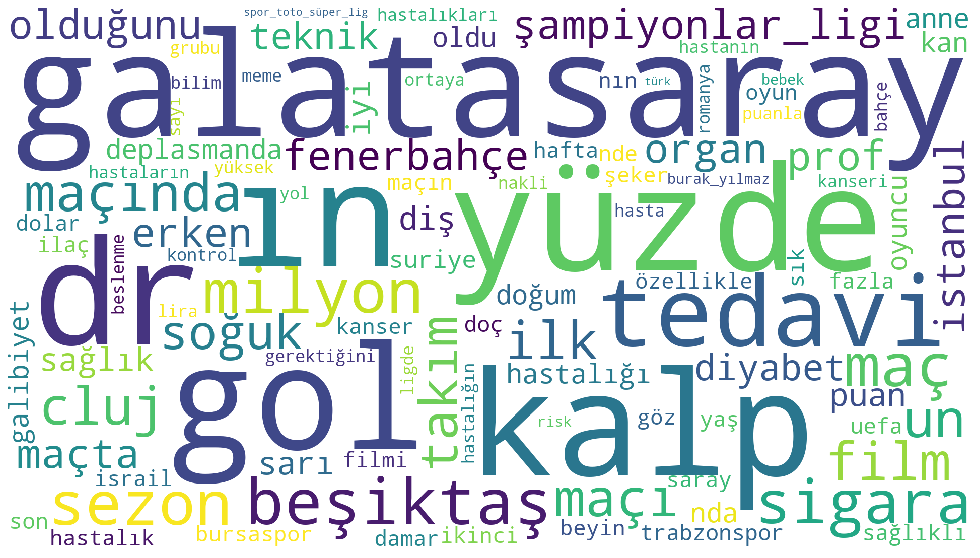




SAGLIK 


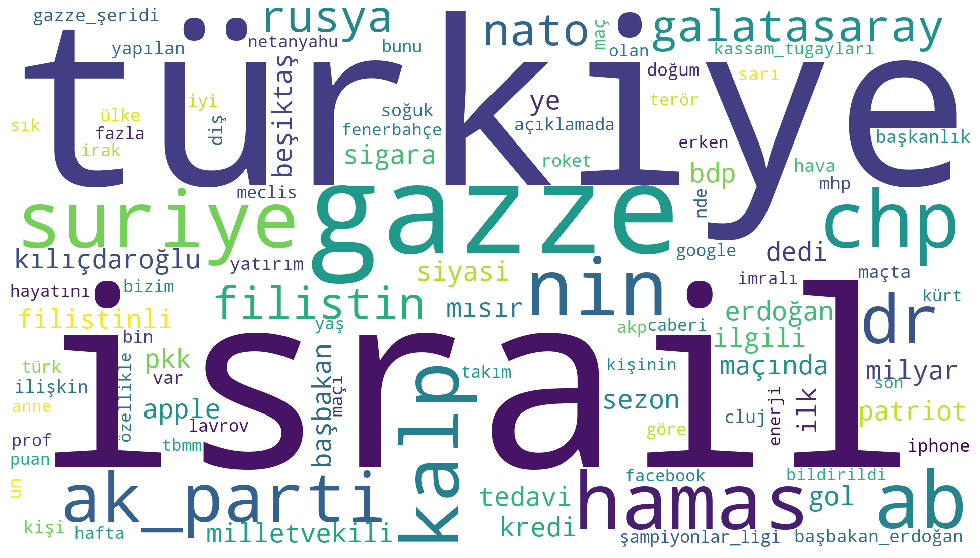




SPOR 


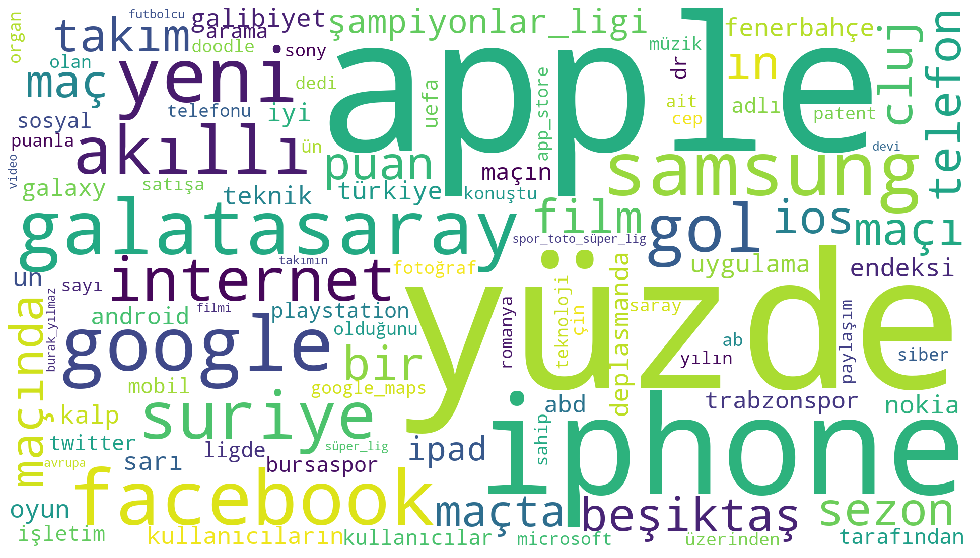




TEKNOLOJI 


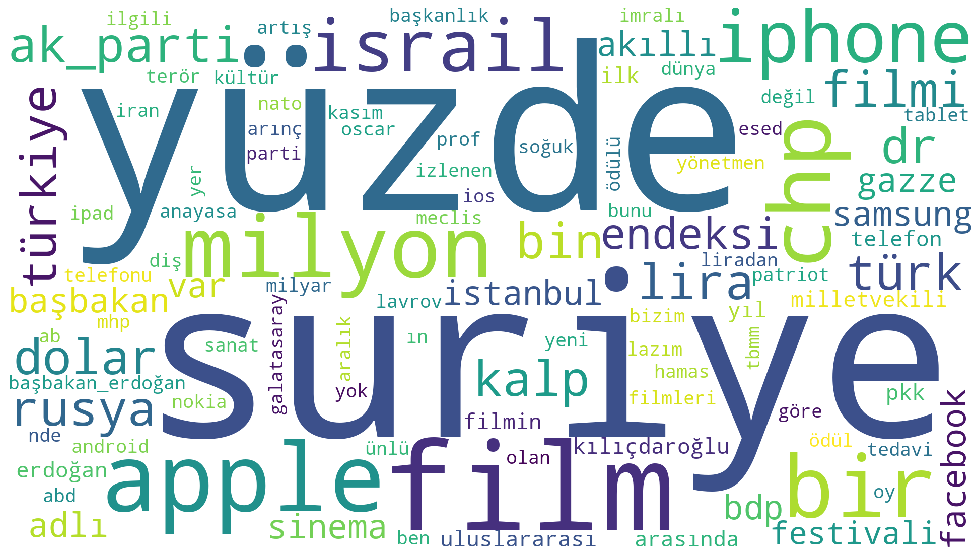

In [19]:
from wordcloud import WordCloud

for i in range(len(all_list)):
    
    print(encoding_matrix.columns[i].upper())
    
    unique_string=(" ").join(all_list[i][:100])

    wordcloud = WordCloud(width=1920, height=1080, background_color="white").generate(unique_string)

    fig, ax = plt.subplots(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    print("\n\n")

### TF-IDF Results

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

models = []

models.append(('Naive Bayes', GaussianNB()))
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))

In [21]:
x = lsa
y = df.category

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

for name, model in models:
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("%s -> Accuracy: %%%.2f" % (name,metrics.accuracy_score(y_test,y_pred)*100))

Naive Bayes -> Accuracy: %69.08
Logistic Regression -> Accuracy: %79.18
Decision Tree -> Accuracy: %75.20
RandomForestClassifier -> Accuracy: %82.45


### BoW Results

In [22]:
x = svd.fit_transform(bag_of_words)
y = df.category

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

for name, model in models:
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("%s -> Accuracy: %%%.2f" % (name,metrics.accuracy_score(y_test,y_pred)*100))

Naive Bayes -> Accuracy: %33.47
Logistic Regression -> Accuracy: %49.80
Decision Tree -> Accuracy: %51.12
RandomForestClassifier -> Accuracy: %61.02


## WORD2VEC

In [23]:
import gensim

w2v = gensim.models.Word2Vec(window=10, min_count=2, workers=4)
w2v.build_vocab(df['tokens'], progress_per=1000)

2022-01-08 18:33:23,546 - gensim.utils - INFO
Msg: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=100, alpha=0.025)', 'datetime': '2022-01-08T18:33:23.546716', 'gensim': '4.1.2', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}

2022-01-08 18:33:23,546 - gensim.models.word2vec - INFO
Msg: collecting all words and their counts

2022-01-08 18:33:23,546 - gensim.models.word2vec - INFO
Msg: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types

2022-01-08 18:33:23,679 - gensim.models.word2vec - INFO
Msg: PROGRESS: at sentence #1000, processed 258619 words, keeping 41631 word types

2022-01-08 18:33:23,786 - gensim.models.word2vec - INFO
Msg: PROGRESS: at sentence #2000, processed 496220 words, keeping 61846 word types

2022-01-08 18:33:23,900 - gensim.models.word2vec - INFO
Msg: PROGRESS: at sentence #3000, processed 740984 words, keeping 84050 word types

2022-01-08 

In [24]:
w2v.train(df['tokens'], total_examples = w2v.corpus_count, epochs = w2v.epochs)

2022-01-08 18:33:25,595 - gensim.utils - INFO
Msg: Word2Vec lifecycle event {'msg': 'training model with 4 workers on 64027 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2022-01-08T18:33:25.595519', 'gensim': '4.1.2', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'train'}

2022-01-08 18:33:26,607 - gensim.models.word2vec - INFO
Msg: EPOCH 1 - PROGRESS: at 96.57% examples, 1030799 words/s, in_qsize 3, out_qsize 1

2022-01-08 18:33:26,609 - gensim.models.word2vec - INFO
Msg: worker thread finished; awaiting finish of 3 more threads

2022-01-08 18:33:26,613 - gensim.models.word2vec - INFO
Msg: worker thread finished; awaiting finish of 2 more threads

2022-01-08 18:33:26,624 - gensim.models.word2vec - INFO
Msg: worker thread finished; awaiting finish of 1 more threads

2022-01-08 18:33:26,625 - gensim.models.word2vec - INFO
Msg: worker thr

(5321098, 5705700)

In [25]:
w2v.wv['beşiktaş']

array([-0.36290056,  0.7001267 ,  0.71598494, -0.36167789,  1.6161535 ,
       -0.9703201 , -0.00635548,  1.8078171 , -1.4979031 , -0.24911645,
       -0.30851105, -1.4467648 ,  0.47421   , -0.62239695,  1.8159033 ,
       -0.15865806,  0.76167506,  0.38893178, -0.6672214 , -1.3442274 ,
       -0.00543517,  1.0492405 ,  0.5671803 , -1.7779783 , -0.07650707,
       -0.12373025, -0.29623199, -0.0214084 , -1.5804898 , -0.01323942,
        1.1389064 , -0.5663759 , -0.28611606, -0.6680568 ,  0.1465742 ,
       -0.23033366,  0.6031158 , -0.60139906, -0.61774945, -1.038065  ,
        0.7947236 , -1.524948  ,  0.21499479, -0.36568615,  0.5142479 ,
        0.15118158, -0.47089157,  0.52648115,  0.5803138 ,  0.85819167,
        0.20283781, -0.6452098 , -0.3314462 , -1.1921736 , -0.97510636,
        0.65871763,  0.6163022 ,  0.47236636,  0.2920792 ,  1.335774  ,
        0.6809795 , -1.1035917 , -0.15953374, -0.7466286 ,  0.01776749,
        1.2115678 , -0.18833934,  0.32807288, -0.83892345,  0.35

In [26]:
w2v.wv.most_similar("beşiktaş")

[('burak_yılmaz', 0.9621725082397461),
 ('trabzonspor', 0.9607208371162415),
 ('sahasında', 0.9576115012168884),
 ('yenildi', 0.9549670219421387),
 ('kasımpaşa', 0.9539368748664856),
 ('futbolcusu', 0.9512823820114136),
 ('serie', 0.9491633176803589),
 ('yenen', 0.9483017325401306),
 ('galatasaray', 0.9480517506599426),
 ('sanica_boru_elazığspor', 0.9477598071098328)]

In [27]:
w2v.wv.similarity(w1 = "futbol", w2 = "galatasaray")

0.75999093

In [28]:
embeddings = w2v.wv
len(embeddings)

64027

### Visualization of Vector Representations

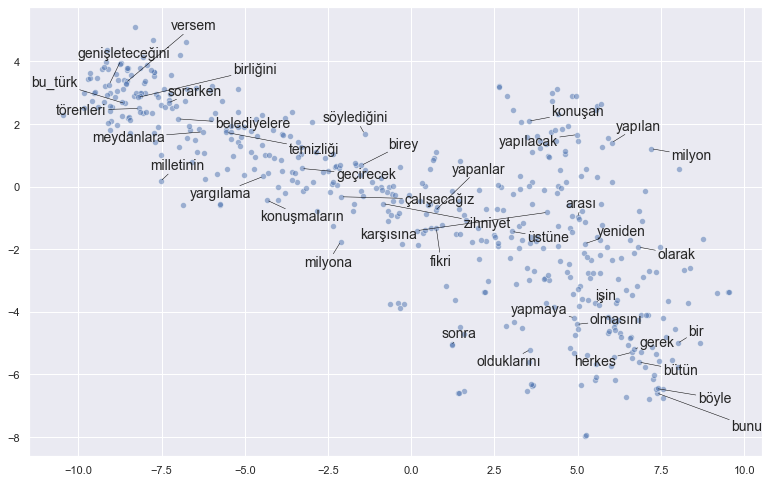

In [29]:
# I only visualized the vector representation of the words in the first text,
# because when I showed all the words, a very confusing image appeared.

words = df['tokens'][0]

vector_list = [w2v.wv[word] for word in words if word in w2v.wv.key_to_index]
words_filtered = [word for word in words if word in w2v.wv.key_to_index]
word_vec_zip = zip(words_filtered, vector_list)
word_vec_dict = dict(word_vec_zip)

df_new = pd.DataFrame.from_dict(word_vec_dict, orient = 'index')

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
tsne_df = tsne.fit_transform(df_new)

sns.set()
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df_new.index[word], fontsize = 14))

adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

### Representation of Word2Vec as Dataframe

In [30]:
Word2VecDf = pd.DataFrame()

for text in df['tokens']:
    temp_df = pd.DataFrame()
    for word in text:
        try:
            temp_df = temp_df.append(pd.Series(embeddings[word]), ignore_index = True)
        except:
            pass
    Word2VecDf = Word2VecDf.append(temp_df.mean(), ignore_index = True)

In [31]:
Word2VecDf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.011496,0.240142,0.405665,-0.049832,0.239281,-0.595901,0.195765,0.766375,-0.522597,-0.290018,...,0.087663,0.341065,0.043308,0.014186,1.081872,0.145664,0.109596,-0.564703,0.386107,0.247185
1,0.178568,0.075964,0.479982,-0.035824,0.028723,-0.408321,0.005054,0.823696,-0.410794,-0.209935,...,0.121995,0.061837,-0.013183,0.042877,0.915942,0.095484,0.151994,-0.403378,0.253733,0.185781
2,0.061843,0.110351,0.489459,-0.030640,0.086755,-0.468135,0.061602,0.845355,-0.557008,-0.190881,...,0.092788,0.182544,0.041318,0.052185,1.023831,0.144348,0.115690,-0.423778,0.344365,0.146216
3,-0.013755,0.184827,0.509709,-0.124123,0.316402,-0.305139,-0.014785,0.698792,-0.452472,-0.104775,...,0.244057,0.099520,0.002759,0.069405,0.688761,0.129945,0.107361,-0.362398,0.024622,-0.041869
4,-0.025857,0.297467,0.488007,-0.134639,0.165446,-0.648459,0.318184,0.817860,-0.639818,-0.349786,...,0.098098,0.301242,0.079069,0.072751,1.120896,0.046800,0.116062,-0.530387,0.381107,0.420962


### Models

In [32]:
x = Word2VecDf
y = df.category

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

for name, model in models:
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("%s -> Accuracy: %%%.2f" % (name,metrics.accuracy_score(y_test,y_pred)*100))

Naive Bayes -> Accuracy: %48.67
Logistic Regression -> Accuracy: %63.67
Decision Tree -> Accuracy: %57.24
RandomForestClassifier -> Accuracy: %67.55


## WORD2VEC & LSA

In [33]:
word2vec_and_lsa = pd.DataFrame(pd.np.column_stack([Word2VecDf, lsa]))
word2vec_and_lsa.shape

(4900, 107)

### Models

In [34]:
x = word2vec_and_lsa
y = df.category

for name, model in models:
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("%s -> Accuracy: %%%.2f" % (name,metrics.accuracy_score(y_test,y_pred)*100))

Naive Bayes -> Accuracy: %48.67
Logistic Regression -> Accuracy: %63.67
Decision Tree -> Accuracy: %53.57
RandomForestClassifier -> Accuracy: %66.63


## Best Model

##### Our best model was LSA model and Random Forest Classifier working with TF-IDF vectorizer

### Hyperparameter Tuning by RandomizedSearchCV

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
x = lsa
y = df.category

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=33, n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=33, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

### Best Models Confusion Matrix

Accuracy: 0.8244897959183674 


2022-01-08 19:01:31,511 - numexpr.utils - INFO
Msg: NumExpr defaulting to 8 threads.



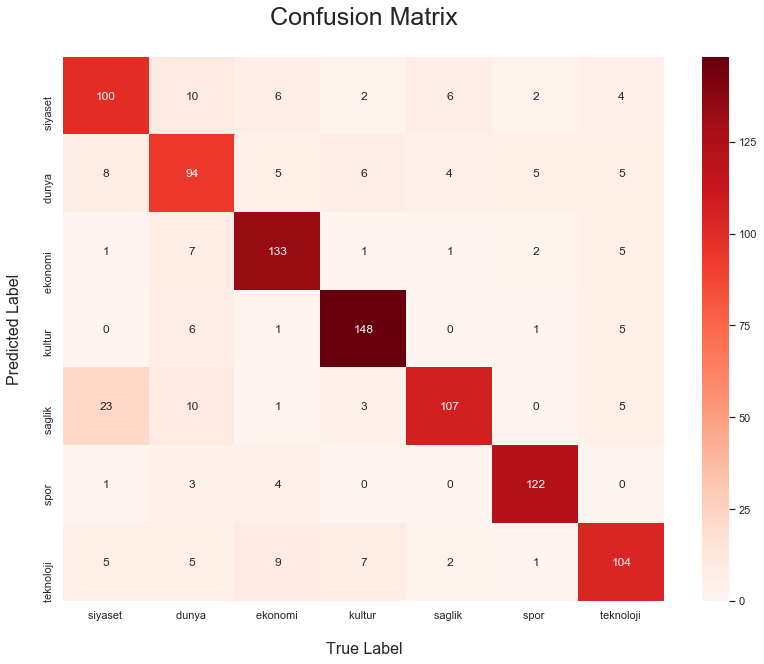

In [38]:
from sklearn.metrics import confusion_matrix

def evaluate(model, test_features, test_labels):
    
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",accuracy, "\n\n")
    cm = confusion_matrix(y_test,y_pred)
    
    plt.figure(figsize=(12,10))
    sentiment_classes = df.category.unique()
    ax = sns.heatmap(cm, cmap = plt.cm.Reds, annot = True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion Matrix\n', fontsize=25)
    plt.xlabel('\nTrue Label', fontsize=16)
    plt.ylabel('Predicted Label\n', fontsize=16)
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 

    plt.show()
    
evaluate(rf_random.best_estimator_, x_test, y_test)